# Assignment 4

This assignment will test your understanding and knowledge of the following notions:

- correlation and correlation coefficient
- linear regression
- dependent and independent variable
- predictor and response

You will be working with the `winequality-red.csv` dataset. The dataset is structured in the same way as the one we have used in the lab, but it is about red wines. Note: fields are separated using a semincolomn (`;`) not a comma.

**Your Tasks**

- Inspect the dataset. For each variables - excluding `quality` plot their distribution (i.e., make a histograms)
- Find what are unique values in the `quality` column.
- Besides the fact that you may be a wine expert or not, select two variables that you think that may be good predictors for the `quality`. Your selection can be random, grounded in some research (e.g., https://www.sciencedirect.com/topics/food-science/wine-quality - use your RUG mail if you have problem accessing the papers), or based on [which other statistical analysis tool we have seen that can be used to decide which variable to use as a predictor?]
- For each predictor, plot the correlation with respect to the `quality` variable.
- Split your dataset in train and test using the `train_test_split()` function.
- Run your linear regression experiments (one per predictor variable you have selected) and save the models.
- Evaluate your model against the test set data using `mean_squared_error()`.

Requirement:

- rename this notebook with your s-number
- upload the jupyter notebook
- upload the saved models (in a zipped folder)
- upload your report in a separate file (if written)

Each document file should be uploaded as a separate document.

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,cross_val_score,train_test_split,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('winequality-red.csv',sep = ';')

In [44]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### 1) For each variables - excluding quality plot their distribution.

In [45]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

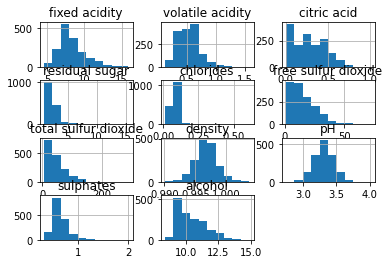

In [46]:
# excluding 'quality' and plot histograms for each column

df_distrib = df.drop('quality',axis=1)
df_distrib.hist()

#### 2) Find what are unique values in the quality column.

In [47]:
# Get the unique values in the "quality" column
unique_values = df['quality'].unique()

# Print the unique values
print(unique_values)

[5 6 7 4 8 3]


#### 3) Select two variables that you think that may be good predictors for the quality.

I choose "fixed acidity" and "pH" as the predictors

#### 4) For each predictor, plot the correlation with respect to the quality variable.

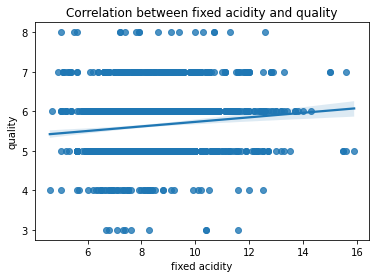

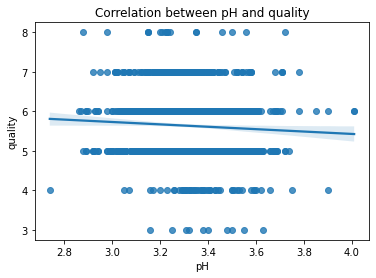

In [48]:
# Define the predictor variables
predictors = ['fixed acidity', 'pH']

# Plot the correlation between each predictor and quality, add a correlation line
for pred in predictors:
    sns.regplot(x=pred, y='quality', data=df)
    plt.title(f'Correlation between {pred} and quality')
    plt.xlabel(pred)
    plt.ylabel('quality')
    plt.show()

#### 5) Split your dataset in train and test using the train_test_split() function.

#### FIXED ACIDITY

In [51]:
# Create a subset with fixed acidity and quality columns
df_fa = df[['fixed acidity', 'quality']]

# Select the predictor and response variables
predictor_fa = df_fa[['fixed acidity']]
response_fa = df_fa[['quality']]

In [52]:
# Split the data into training and testing sets
# set the parameter 'test_size' to 40, 40% of the data will be used for testing
# set the parameter 'random_state' to 101 for reproducibility 

X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(predictor_fa, response_fa, test_size=0.4, random_state=101)

#### 6) Run your linear regression experiments (one per predictor variable you have selected) and save the models.

In [53]:
# Instantiate the Linear Regressor 
linreg_fa = LinearRegression()

# Select the predictor variable for training
predictor_fa_train = X_train_fa[['fixed acidity']]

# Select the response variable for training
response_fa_train = y_train_fa[['quality']]

# Define the KFold for cross validation. 
# specifies the number of folds, which is set to 10

folds_fa = KFold(n_splits=10, shuffle=True, random_state=100)

# Train and test the model, the mean squared error used as the evaluation metric

scores_fa = cross_val_score(linreg_fa, 
                         predictor_fa_train, 
                         response_fa_train, 
                         scoring='neg_mean_squared_error', 
                         cv=folds_fa)

# Printing the Mean Squared Errors per fold (10 in total)
print(scores_fa)

# Print the mean of the Mean Squared Errors per fold 
print(scores_fa.mean())

[-0.67957778 -0.63218546 -0.44497551 -0.46136327 -0.69921375 -0.50579194
 -0.65655765 -0.66006974 -0.59769336 -0.77918619]
-0.6116614660668673


In [54]:
# Fit the model to the training data
regressor_trained_fa = linreg_fa.fit(predictor_fa_train, response_fa_train)

# Save the trained model to a file
filename_fa = 'fa_model.sav'
pickle.dump(regressor_trained_fa, open(filename_fa, 'wb'))

In [55]:
# Save the predictor variable for testing
predictor_test_fa = X_test_fa[['fixed acidity']]

# Save the response variable for testing
response_test_fa = y_test_fa[['quality']]

# Using the trained model to make predictions
pred_fa = regressor_trained_fa.predict(predictor_test_fa)

In [56]:
# convert model predictions into a dataframe
df_pred_fa = pd.DataFrame(data=pred_fa, columns=["prediction"])
print(df_pred_fa)

     prediction
0      5.635924
1      5.582730
2      5.589379
3      5.609327
4      5.569431
..          ...
635    5.642573
636    5.709066
637    5.722365
638    5.529535
639    5.722365

[640 rows x 1 columns]


In [57]:
# concatenate the prediction and the gold data into the same dataframe
pd.concat([df_pred_fa, response_fa], axis=1)

,prediction,quality
0,5.635924,5
1,5.582730,5
2,5.589379,5
3,5.609327,6
4,5.569431,5
...,...,...
1594,NaN,5
1595,NaN,6
1596,NaN,6
1597,NaN,5


#### 7) Evaluate your model against the test set data using mean_squared_error().  

In [58]:
# Calculate the mean squared error between the predicted values for the fixed acidity model
# print the actual mean_squared_error 
mean_squared_error(pred_fa,response_test_fa)

0.6921105950313683

### Do the same with the 'pH' predictor.

In [59]:
# Second model with pH as predictor
# Create a subset with pH and quality columns and select the predictor and response variables

df_ph = df[['pH', 'quality']]
predictor_ph = df_ph[['pH']]
response_ph = df_ph[['quality']]

# Split the data into training and testing sets
X_train_ph, X_test_ph, y_train_ph, y_test_ph = train_test_split(predictor_ph, response_ph, test_size=0.4, random_state=101)

linreg_ph = LinearRegression()

# Select the predictor variable and response variable for training
predictor_ph_train = X_train_ph[['pH']]
response_ph_train = y_train_ph[['quality']]

# Define the KFold for cross validation
folds_ph = KFold(n_splits=10, shuffle=True, random_state=100)

# Train and test the model
scores_ph = cross_val_score(linreg_ph, 
                         predictor_ph_train, 
                         response_ph_train, 
                         scoring='neg_mean_squared_error', 
                         cv=folds_ph)

# Fit the model to the training data and save the trained model to a file
regressor_trained_ph = linreg_ph.fit(predictor_ph_train, response_ph_train)

filename_ph = 'ph_model.sav'
pickle.dump(regressor_trained_ph, open(filename_ph, 'wb'))

# # Save the predictor variable and the response variable for testing
predictor_test_ph = X_test_ph[['pH']]
response_test_ph = y_test_ph[['quality']]

pred_ph = regressor_trained_ph.predict(predictor_test_ph)

# convert model predictions into a dataframe
df_pred_ph = pd.DataFrame(data=pred_ph, columns=["prediction"])
print(df_pred_ph)

     prediction
0      5.575886
1      5.653996
2      5.600739
3      5.742756
4      5.643344
..          ...
635    5.611390
636    5.693050
637    5.675298
638    5.710802
639    5.639794

[640 rows x 1 columns]


In [60]:
# Calculate the mean squared error between the predicted values for the pH model
# print the actual mean_squared_error 
mean_squared_error(pred_ph,response_test_ph)

0.6960340442684373